<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/Maths_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository first using the following command
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 2.463s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np


Load ‘data.mat’ into your Python code, where you will find $x,y∈R^{1001}$. 

# Dataset

In [3]:
data = loadmat(r"Ex1/data.mat")
x = data['x'].flatten()
y = data['y'].flatten()

# 1

## a. 
Plot the data using plot function. 

Text(0, 0.5, 'y')

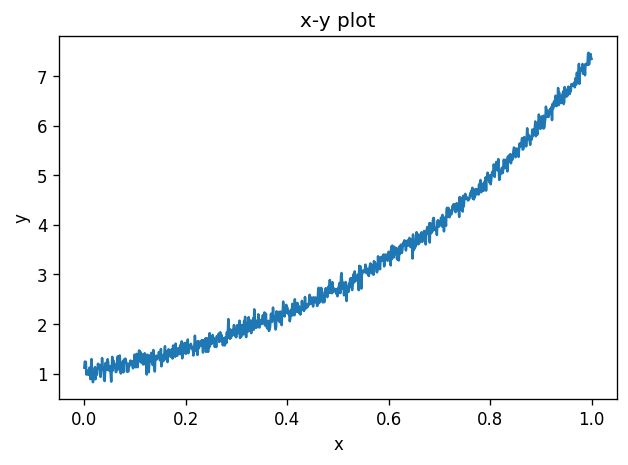

In [ ]:
plt.figure(num=0, dpi=120)
plt.plot(x, y)
plt.title("x-y plot")
plt.xlabel("x")
plt.ylabel("y")


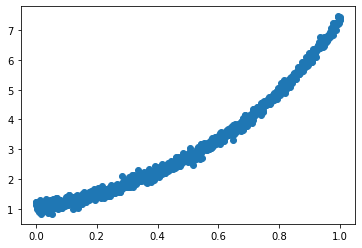

In [ ]:
plt.scatter(x, y)

## b. 
Compute the least square line $y=θ_0+xθ_1$ using the given data and overlay the line over the given data.
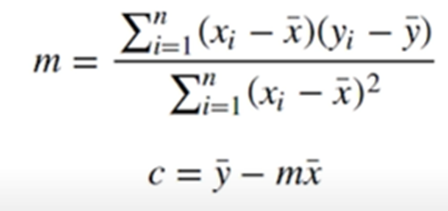

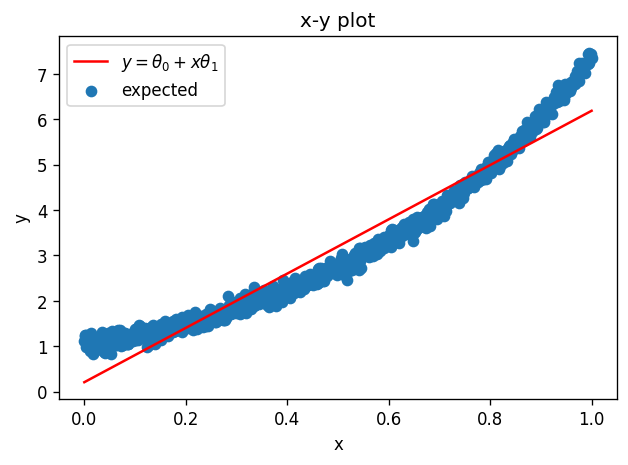

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)
#θ0 θ1
num, den = 0, 0
for i in range(len(x)):
  num += (x[i] - x_mean)*(y[i] - y_mean)
  den += (x[i] - x_mean) ** 2

θ1 = num / den
θ0 = y_mean - θ1 * x_mean
Y1 = θ1 * x + θ0

plt.figure(num=0, dpi=120)
plt.scatter(x, y, label = r"expected")
plt.plot(x, Y1, "r", label="$y=θ_0+xθ_1$")
plt.title("x-y plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# 2. 
Using the same data from Question 2, compute the least square parabola (i.e. second order polynomial $y=θ_0+xθ_1+x^2 θ_2)$ to fit the data. (5%) Explain which formulation (line or parabola) is more suitable for this dataset and why (please calculate the mean square error for these two fitting equations)?

First, find $θ_0, θ_1, θ_2$ using PolynomialFeatures library in sklearn.

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
a = PolynomialFeatures(2)
model = make_pipeline(a, LinearRegression())
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

model.steps[1][1].coef_, model.steps[1][1].intercept_

coe = model.steps[1][1].coef_
θ0, θ1, θ2 = model.steps[1][1].intercept_[0], coe[0][1], coe[0][2]

In [ ]:
x.reshape(-1, 1)

In [6]:
# Predict the expected values of y
Y2 = θ0 + θ1 * x + θ2 * (x ** 2)

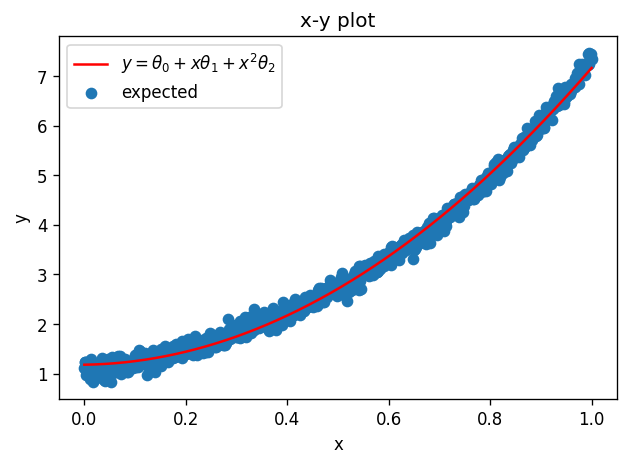

In [28]:
plt.figure(num=0, dpi=120) 
plt.scatter(x, y, label = r"expected") 
plt.plot(x, Y2, "r", label="$y=θ_0+xθ_1+x^2θ_2$") 
plt.title("x-y plot") 
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [7]:
# Mean squared error
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(mean_squared_error(y,Y1)) # for linear least square
rmse2 = np.sqrt(mean_squared_error(y,Y2)) # for quadratic least square
print(f"rmse for 1.b is: {rmse1} while rmse for q2 is: {rmse2}.")

rmse for 1.b is: 0.453658425277404 while rmse for q2 is: 0.12547876286929022.


 Explain which formulation (line or parabola) is more suitable for this dataset and why. \\
**The parabola is more suitable for this dataset because the prediction for y is more closer to the parabola than the line as the root mean squared error and the visual plots indicate it clearly.**

# 3. (15%)
Following the previous two questions, please randomly select $100$ data samples for $50$ times and plot these $50$ lines $(y=θ_0+xθ_1)$ and parabolas $(y=θ_0+xθ_1+x^2 θ_2)$ in two separate figures, one for lines and the other for parabolas. (5%) Explain these visualizations based on the bias and variance.

In [8]:
import random


In [ ]:
samples = []
for i in range(50):
  sample = random.sample(list(x), 100)
  samples.append(sample)

In [49]:
lines = []
parabolas = []

for i in range(50):
  xs = random.sample(list(x), 100) # 100 samples in each iteration
  xs = np.sort(np.array(xs)) # change samples from list back to array
  Ys1 = θ0 + θ1 * xs 
  Ys2 = θ0 + θ1 * xs + θ2 * (xs ** 2)
  lines.append([xs, Ys1])
  parabolas.append([xs, Ys2])

Lines plot

<function matplotlib.pyplot.show(*args, **kw)>

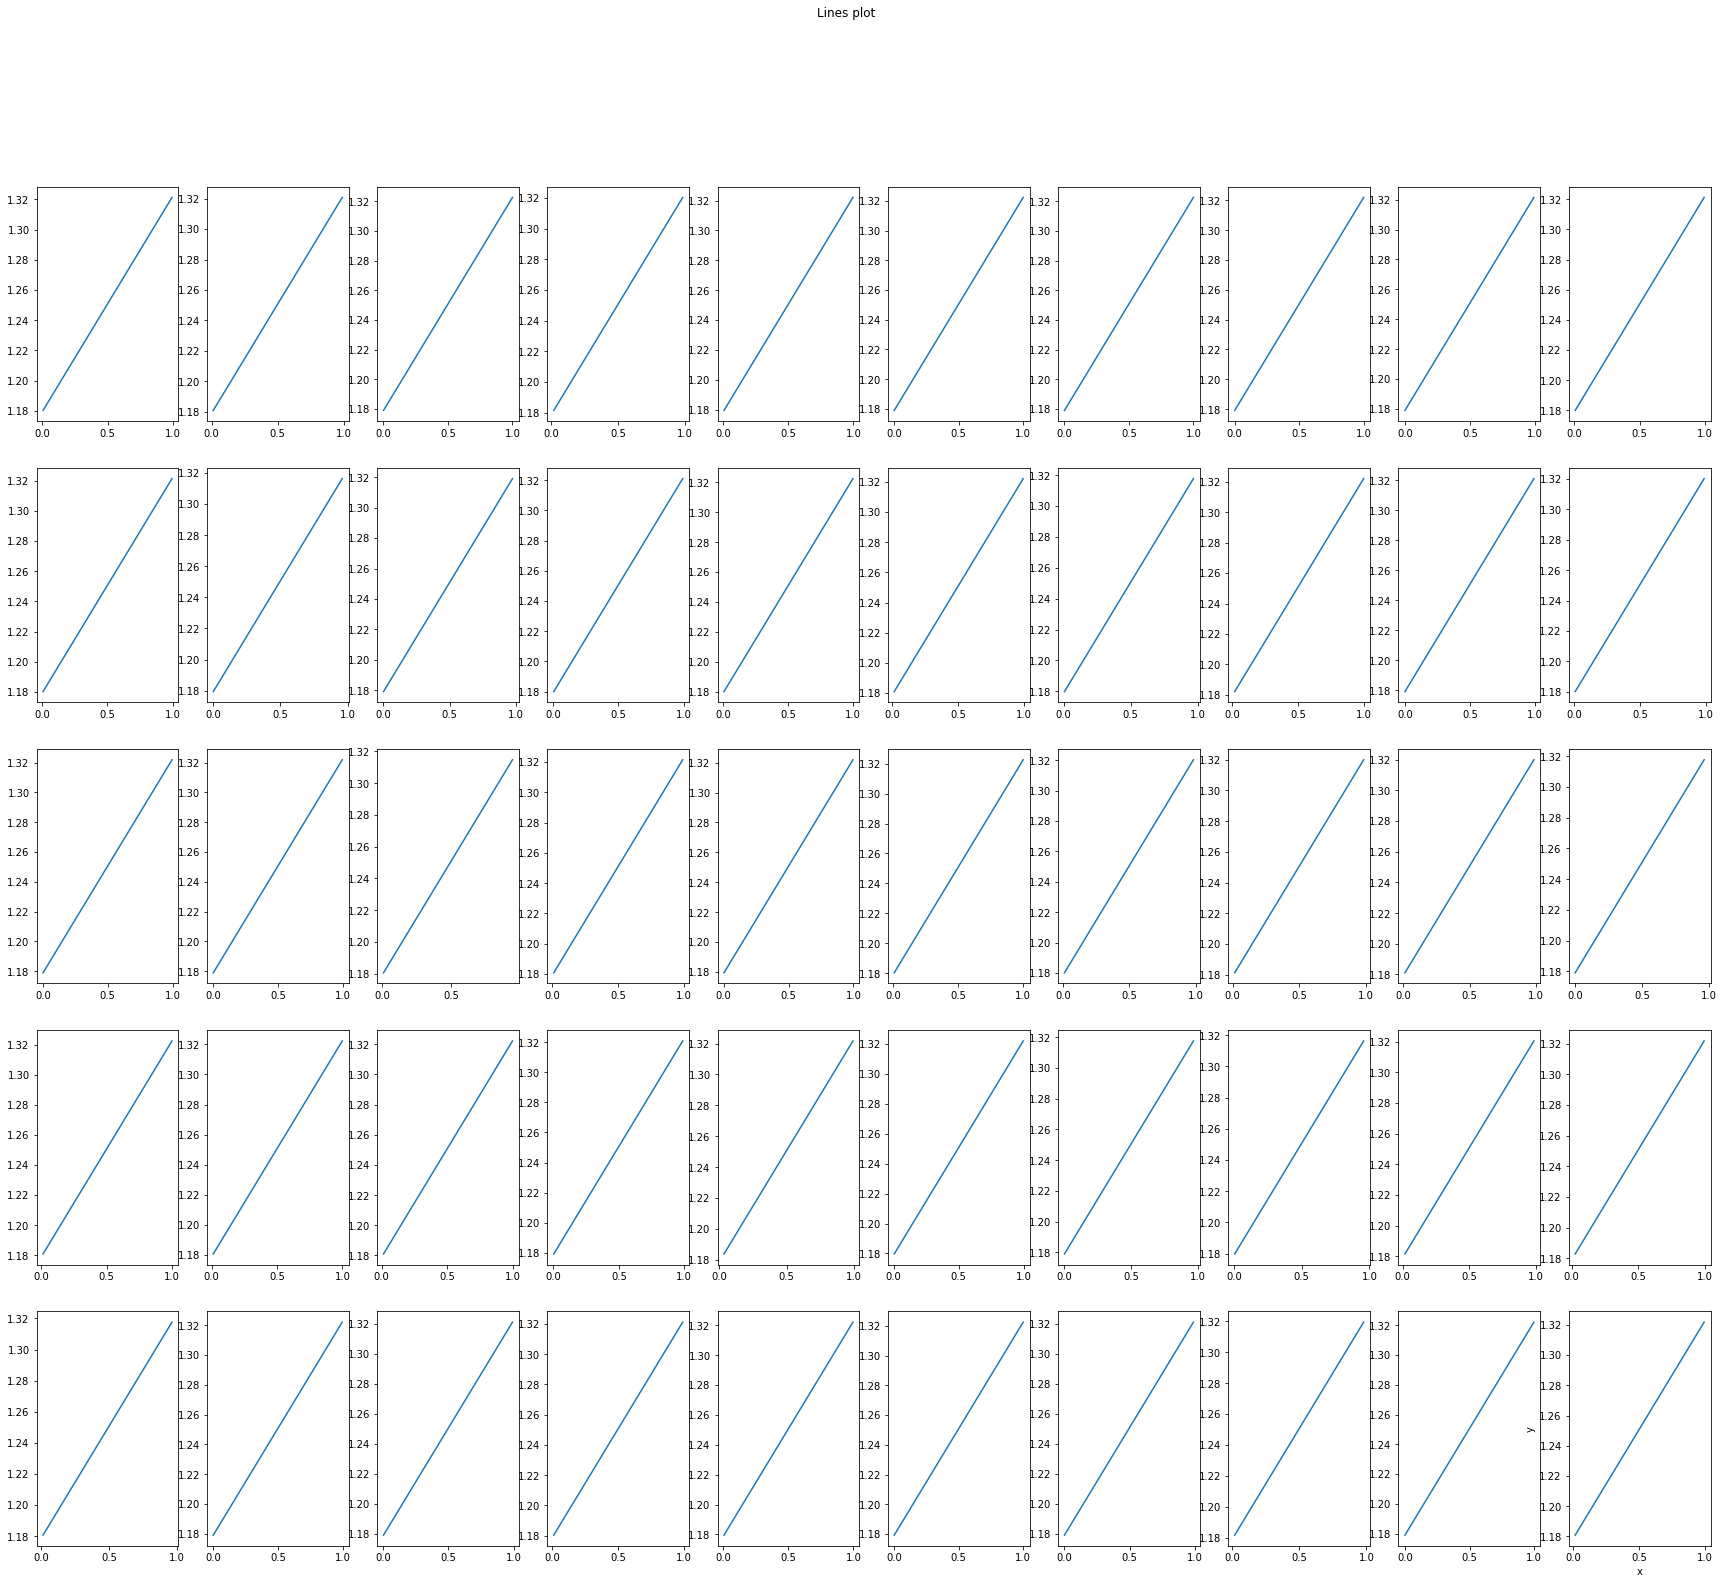

In [58]:
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(30, 25))
for i in range(len(lines)):
  plt.subplot(5, 10, i+1)
  plt.plot(lines[i][0], lines[i][1])
fig.suptitle('Lines plot')
plt.xlabel("x")
plt.ylabel("y")
#plt.legend()
plt.show

Parabolas plot

<function matplotlib.pyplot.show(*args, **kw)>

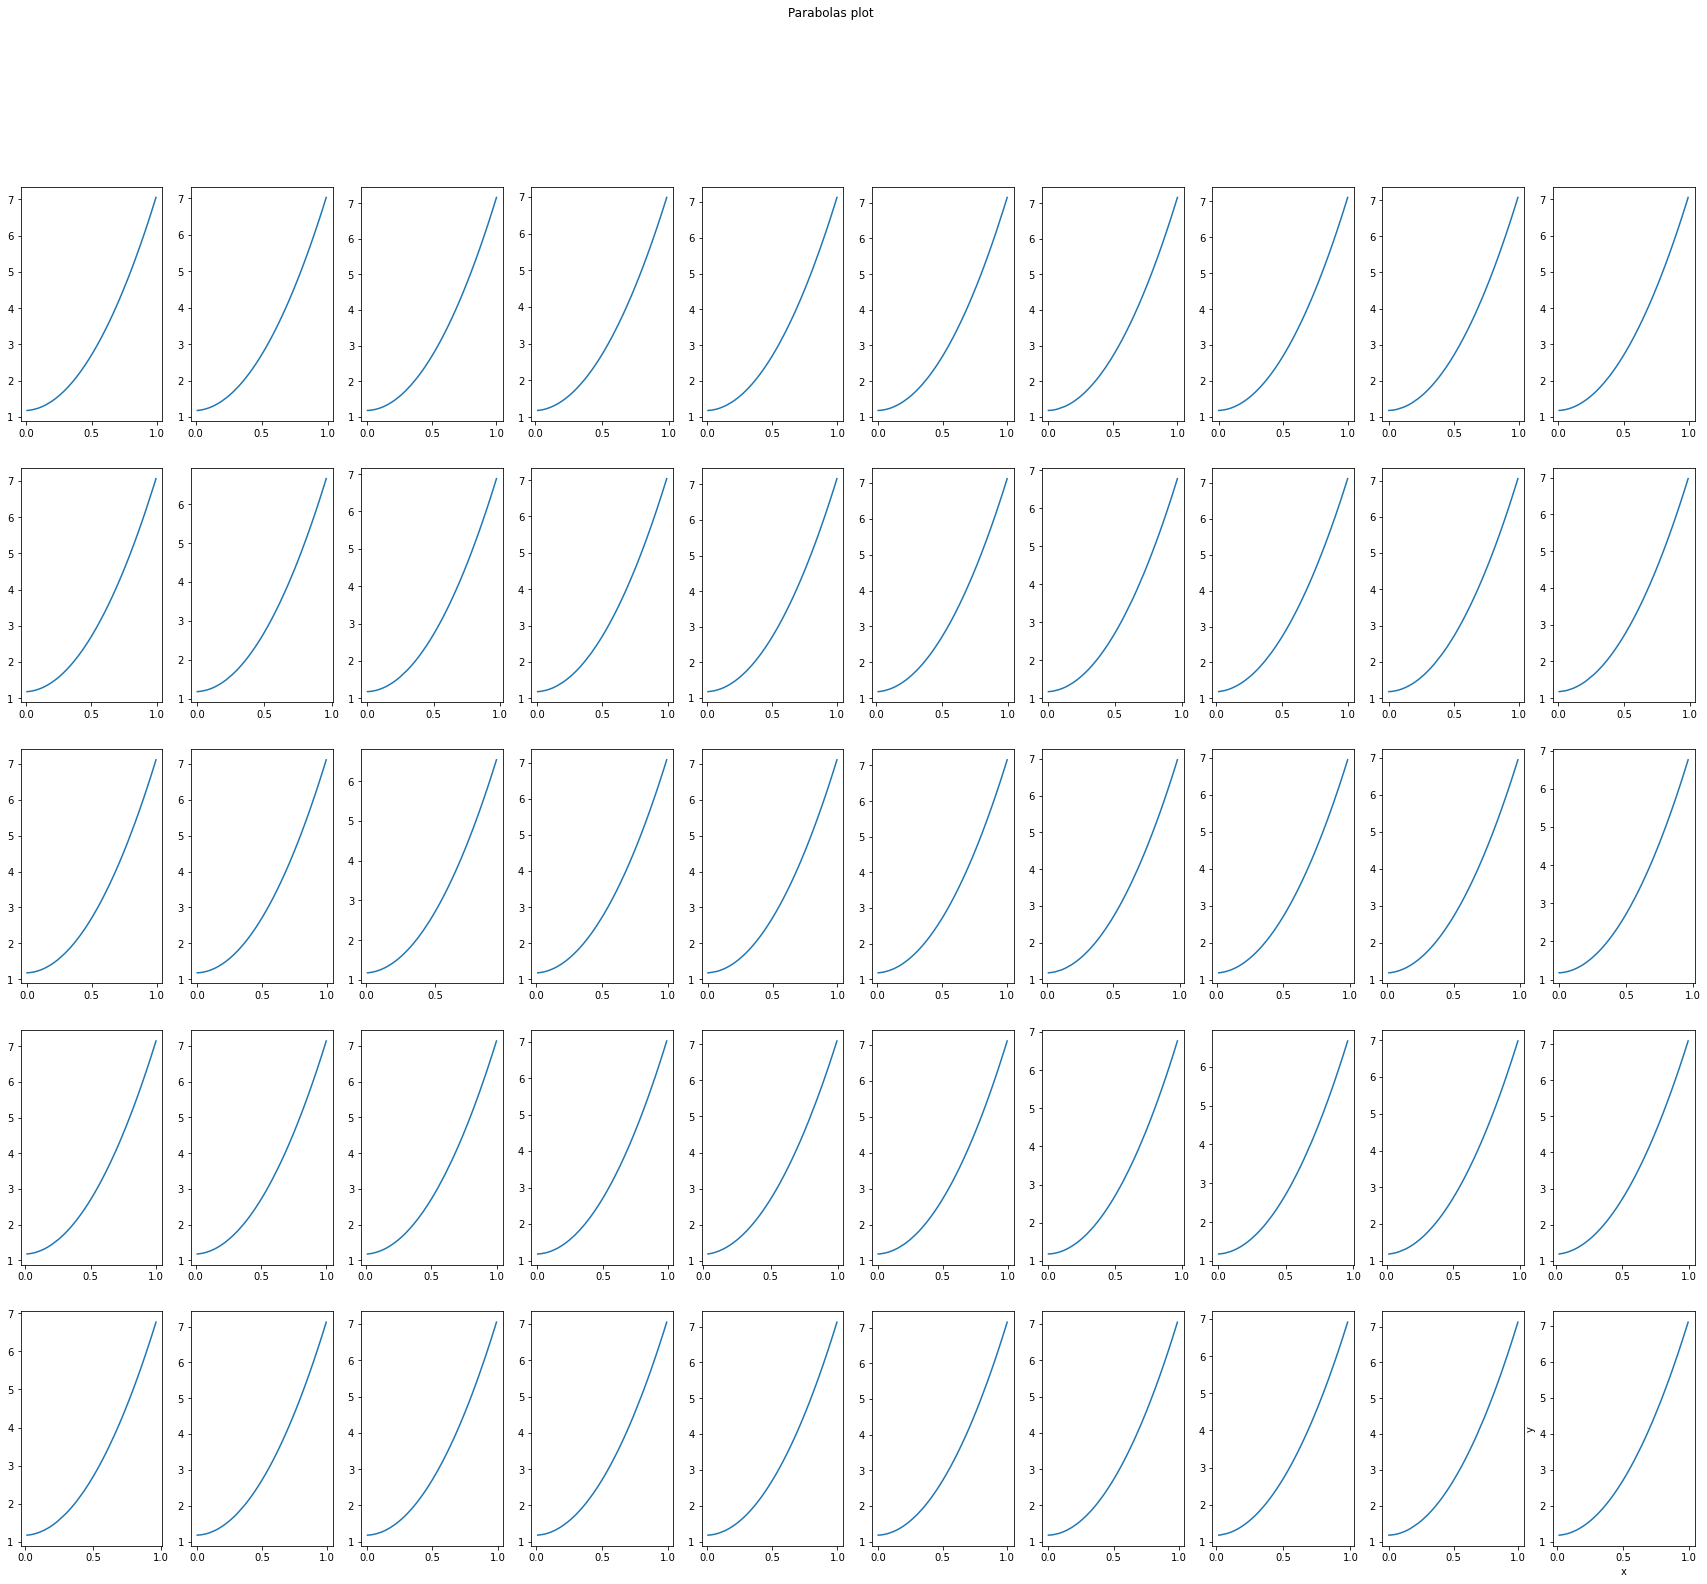

In [59]:
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(30, 25))
for i in range(len(parabolas)):
  plt.subplot(5, 10, i+1)
  plt.plot(parabolas[i][0], parabolas[i][1])
fig.suptitle('Parabolas plot')
plt.xlabel("x")
plt.ylabel("y")
plt.show

# 4. (10%) 
In ‘train.mat,’ you can find 2-D points $X=[x1, x2]$ and their corresponding labels $Y=y$. Please use logistic regression $h(θ)=1/(1+e^(-θ^T x))$  to find the decision boundary (optimal $θ^*$) based on ‘train.mat.” Please use a gradient descent method to solve it and report the test error on the test dataset ‘test.mat.’ (percentage of misclassified test samples) 

In [63]:
train = loadmat(r"Ex1/train.mat")
train_x1 = train['x1'].flatten()
train_x2 = train['x2'].flatten()
train_y = train['y'].flatten()


In [64]:
test = loadmat(r"Ex1/test.mat")
test_x1 = test['x1'].flatten()
test_x2 = test['x2'].flatten()
test_y = test['y'].flatten()